# Network Intrusion Detector
Project 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

old_df = pd.read_csv('UNSW_NB15_training-set_csc215.csv')
test_df = pd.read_csv('UNSW_NB15_test-set_csc215.csv')


In [2]:
old_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [3]:
#counting no.of rows
file = open("UNSW_NB15_training-set_csc215.csv")
numline = len(file.readlines())
print (numline)

175342


In [4]:
#Searching for null values in training data
old_df=pd.read_csv('UNSW_NB15_training-set_csc215.csv', na_values=['-','?'])
old_df[old_df.isnull().any(axis=1)]

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,NaN,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,NaN,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,NaN,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,NaN,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,NaN,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
6,7,0.637109,tcp,NaN,FIN,10,8,534,354,26.683033,...,1,40,0,0,0,1,39,0,Normal,0
7,8,0.521584,tcp,NaN,FIN,10,8,534,354,32.593026,...,1,40,0,0,0,3,39,0,Normal,0
8,9,0.542905,tcp,NaN,FIN,10,8,534,354,31.313031,...,1,40,0,0,0,3,39,0,Normal,0
9,10,0.258687,tcp,NaN,FIN,10,6,534,268,57.985135,...,1,40,0,0,0,3,39,0,Normal,0
10,11,0.304853,tcp,NaN,FIN,12,6,4142,268,55.764583,...,1,3,0,0,0,1,6,0,Normal,0


In [5]:
#Removing rows in training data that contain atleast one null value. 
old_df=old_df.dropna(how='any')
old_df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
22,23,0.964656,tcp,ftp,CON,14,12,690,950,25.915974,...,1,2,1,1,0,2,1,0,Normal,0
28,29,0.546425,tcp,http,FIN,10,8,1168,1040,31.111315,...,1,2,0,0,1,1,8,0,Normal,0
30,31,0.725996,tcp,http,FIN,10,16,822,12220,34.435451,...,1,2,0,0,1,2,1,0,Normal,0
31,32,0.274605,tcp,http,FIN,10,6,1228,268,54.623913,...,1,4,0,0,1,1,8,0,Normal,0
32,33,0.337456,tcp,http,FIN,10,8,800,2260,50.376940,...,1,1,0,0,1,1,8,0,Normal,0


In [6]:
#Searching for null values in testing data
test_df=pd.read_csv('UNSW_NB15_test-set_csc215.csv', na_values=['-','?'])
test_df[test_df.isnull().any(axis=1)]

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,NaN,INT,2,0,496,0,9.090909e+04,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,NaN,INT,2,0,1762,0,1.250000e+05,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,NaN,INT,2,0,1068,0,2.000000e+05,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,NaN,INT,2,0,900,0,1.666667e+05,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,NaN,INT,2,0,2126,0,1.000000e+05,...,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,NaN,INT,2,0,784,0,3.333333e+05,...,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,NaN,INT,2,0,1960,0,1.666667e+05,...,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,NaN,INT,2,0,1384,0,3.571429e+04,...,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,NaN,INT,1,0,46,0,0.000000e+00,...,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,NaN,INT,1,0,46,0,0.000000e+00,...,2,2,0,0,0,2,2,1,Normal,0


In [7]:
#Removing rows in testing data that contain atleast one null value. 
test_df=test_df.dropna(how='any')
test_df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
35,36,0.983874,tcp,http,FIN,10,8,816,1172,17.278635,...,1,2,0,0,1,1,3,0,Normal,0
40,41,1.535254,tcp,http,FIN,10,10,826,1266,12.375802,...,1,2,0,0,1,1,3,0,Normal,0
45,46,1.059359,tcp,http,FIN,10,8,830,1134,16.047441,...,1,1,0,0,1,3,1,0,Normal,0
49,50,0.990548,tcp,http,FIN,10,10,804,1414,19.181301,...,1,2,0,0,1,1,2,0,Normal,0
72,73,1.303518,tcp,http,FIN,12,8,898,1120,14.575939,...,1,1,0,0,1,2,1,0,Normal,0
89,90,2.417396,tcp,http,FIN,12,10,896,1142,8.687033,...,1,1,0,0,1,1,1,0,Normal,0
99,100,1.979445,tcp,http,FIN,10,10,810,1228,9.598650,...,1,2,0,0,1,1,2,0,Normal,0
116,117,1.538604,tcp,http,FIN,10,10,814,1266,12.348856,...,1,2,0,0,1,2,2,0,Normal,0
130,131,1.625287,tcp,http,FIN,12,8,876,1182,11.690243,...,1,1,0,0,1,1,1,0,Normal,0
135,136,1.048635,tcp,http,FIN,10,8,824,1206,16.211551,...,1,4,0,0,1,1,4,0,Normal,0


In [8]:
#Normalizing the training numeric values using zscore
from scipy.stats import zscore
old_df['spkts'] = zscore(old_df['spkts'])
old_df['dpkts'] = zscore(old_df['dpkts'])
old_df['sbytes'] = zscore(old_df['sbytes'])
old_df['dbytes'] = zscore(old_df['dbytes'])
old_df['rate'] = zscore(old_df['rate'])
old_df['sttl'] = zscore(old_df['sttl'])
old_df['dttl'] = zscore(old_df['dttl'])
old_df['sload'] = zscore(old_df['sload'])
old_df['dload'] = zscore(old_df['dload'])
old_df['sloss'] = zscore(old_df['sloss'])
old_df['dloss'] = zscore(old_df['dloss'])
old_df['sinpkt'] = zscore(old_df['sinpkt'])
old_df['dinpkt'] = zscore(old_df['dinpkt'])
old_df['sjit'] = zscore(old_df['sjit'])
old_df['djit'] = zscore(old_df['djit'])
old_df['swin'] = zscore(old_df['swin'])
old_df['stcpb'] = zscore(old_df['stcpb'])
old_df['dtcpb'] = zscore(old_df['dtcpb'])
old_df['dwin'] = zscore(old_df['dwin'])
old_df['smean'] = zscore(old_df['smean'])
old_df['dmean'] = zscore(old_df['dmean'])
old_df['trans_depth'] = zscore(old_df['trans_depth'])
old_df['response_body_len'] = zscore(old_df['response_body_len'])
old_df['ct_srv_src'] = zscore(old_df['ct_srv_src'])
old_df['ct_state_ttl'] = zscore(old_df['ct_state_ttl'])
old_df['ct_dst_ltm'] = zscore(old_df['ct_dst_ltm'])
old_df['ct_src_dport_ltm'] = zscore(old_df['ct_src_dport_ltm'])
old_df['ct_dst_sport_ltm'] = zscore(old_df['ct_dst_sport_ltm'])
old_df['ct_dst_src_ltm'] = zscore(old_df['ct_dst_src_ltm'])
old_df['ct_ftp_cmd'] = zscore(old_df['ct_ftp_cmd'])
old_df['ct_flw_http_mthd'] = zscore(old_df['ct_flw_http_mthd'])
old_df['ct_src_ltm'] = zscore(old_df['ct_src_ltm'])
old_df['ct_srv_dst'] = zscore(old_df['ct_srv_dst'])


old_df.head()


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,-0.048030,-0.044580,-0.055932,-0.077783,-0.624127,...,-0.89029,-0.790893,1,5.266800,-0.278275,-0.855609,-0.927303,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,0.216766,0.076681,0.169686,-0.069496,-0.623959,...,-0.89029,-0.865260,0,-0.175734,-0.278275,-0.955810,-0.927303,0,Normal,0
15,16,0.000002,udp,snmp,INT,-0.100989,-0.135525,-0.057917,-0.082207,2.287063,...,-0.89029,-0.716527,0,-0.175734,-0.278275,-0.855609,-0.927303,0,Normal,0
17,18,0.393556,tcp,http,FIN,-0.058622,-0.074895,-0.054992,-0.075909,-0.623955,...,-0.89029,-0.865260,0,-0.175734,0.719269,-0.955810,-0.778754,0,Normal,0
21,22,0.338017,tcp,http,FIN,-0.058622,-0.090053,-0.054433,-0.080667,-0.623949,...,-0.89029,-0.939626,0,-0.175734,0.719269,-0.855609,-0.778754,0,Normal,0


In [9]:
#Normalizing the testing numeric values using zscore
from scipy.stats import zscore
test_df['spkts'] = zscore(test_df['spkts'])
test_df['dpkts'] = zscore(test_df['dpkts'])
test_df['sbytes'] = zscore(test_df['sbytes'])
test_df['dbytes'] = zscore(test_df['dbytes'])
test_df['rate'] = zscore(test_df['rate'])
test_df['sttl'] = zscore(test_df['sttl'])
test_df['dttl'] = zscore(test_df['dttl'])
test_df['sload'] = zscore(test_df['sload'])
test_df['dload'] = zscore(test_df['dload'])
test_df['sloss'] = zscore(test_df['sloss'])
test_df['dloss'] = zscore(test_df['dloss'])
test_df['sinpkt'] = zscore(test_df['sinpkt'])
test_df['dinpkt'] = zscore(test_df['dinpkt'])
test_df['sjit'] = zscore(test_df['sjit'])
test_df['djit'] = zscore(test_df['djit'])
test_df['swin'] = zscore(test_df['swin'])
test_df['stcpb'] = zscore(test_df['stcpb'])
test_df['dtcpb'] = zscore(test_df['dtcpb'])
test_df['dwin'] = zscore(test_df['dwin'])
test_df['smean'] = zscore(test_df['smean'])
test_df['dmean'] = zscore(test_df['dmean'])
test_df['trans_depth'] = zscore(test_df['trans_depth'])
test_df['response_body_len'] = zscore(test_df['response_body_len'])
test_df['ct_srv_src'] = zscore(test_df['ct_srv_src'])
test_df['ct_state_ttl'] = zscore(test_df['ct_state_ttl'])
test_df['ct_dst_ltm'] = zscore(test_df['ct_dst_ltm'])
test_df['ct_src_dport_ltm'] = zscore(test_df['ct_src_dport_ltm'])
test_df['ct_dst_sport_ltm'] = zscore(test_df['ct_dst_sport_ltm'])
test_df['ct_dst_src_ltm'] = zscore(test_df['ct_dst_src_ltm'])
test_df['ct_ftp_cmd'] = zscore(test_df['ct_ftp_cmd'])
test_df['ct_flw_http_mthd'] = zscore(test_df['ct_flw_http_mthd'])
test_df['ct_src_ltm'] = zscore(test_df['ct_src_ltm'])
test_df['ct_srv_dst'] = zscore(test_df['ct_srv_dst'])

test_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
35,36,0.983874,tcp,http,FIN,-0.044028,-0.056242,-0.047047,-0.063537,-0.654855,...,-0.700427,-0.666208,0,-0.139398,0.739098,-0.778396,-0.707906,0,Normal,0
40,41,1.535254,tcp,http,FIN,-0.044028,-0.041793,-0.047000,-0.063025,-0.654886,...,-0.700427,-0.666208,0,-0.139398,0.739098,-0.778396,-0.707906,0,Normal,0
45,46,1.059359,tcp,http,FIN,-0.044028,-0.056242,-0.046981,-0.063744,-0.654863,...,-0.700427,-0.732642,0,-0.139398,0.739098,-0.601013,-0.845030,0,Normal,0
49,50,0.990548,tcp,http,FIN,-0.044028,-0.041793,-0.047103,-0.062219,-0.654843,...,-0.700427,-0.666208,0,-0.139398,0.739098,-0.778396,-0.776468,0,Normal,0
72,73,1.303518,tcp,http,FIN,-0.031872,-0.056242,-0.046665,-0.063820,-0.654872,...,-0.700427,-0.732642,0,-0.139398,0.739098,-0.689704,-0.845030,0,Normal,0


One-hot encoding the categrical data
In the given data set, features like proto,state, service, attak_cat are of nominal data type, and is_sm_ips_ports,is_ftp_login are of binary datatype.

In [10]:
#One-hot encoding categorical values in testing data
test=pd.get_dummies(test_df, columns=['proto','state','service','attack_cat','is_sm_ips_ports','is_ftp_login'])
test.head()


,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Worms,is_sm_ips_ports_0,is_ftp_login_0,is_ftp_login_1,is_ftp_login_2
35,36,0.983874,-0.044028,-0.056242,-0.047047,-0.063537,-0.654855,-1.100636,1.574395,-0.636446,...,0,0,0,1,0,0,1,1,0,0
40,41,1.535254,-0.044028,-0.041793,-0.047000,-0.063025,-0.654886,-1.100636,1.574395,-0.636474,...,0,0,0,1,0,0,1,1,0,0
45,46,1.059359,-0.044028,-0.056242,-0.046981,-0.063744,-0.654863,-1.100636,1.574395,-0.636451,...,0,0,0,1,0,0,1,1,0,0
49,50,0.990548,-0.044028,-0.041793,-0.047103,-0.062219,-0.654843,-1.100636,1.574395,-0.636448,...,0,0,0,1,0,0,1,1,0,0
72,73,1.303518,-0.031872,-0.056242,-0.046665,-0.063820,-0.654872,-1.100636,1.574395,-0.636458,...,0,0,0,1,0,0,1,1,0,0


In [11]:
#One-hot encoding categorical values in training data
df=pd.get_dummies(old_df, columns=['proto','state','service','attack_cat','is_sm_ips_ports','is_ftp_login'])
df.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Worms,is_sm_ips_ports_0,is_ftp_login_0,is_ftp_login_1,is_ftp_login_2,is_ftp_login_4
3,4,1.681642,-0.048030,-0.044580,-0.055932,-0.077783,-0.624127,-1.042533,1.554597,-0.610105,...,0,0,1,0,0,1,0,1,0,0
11,12,2.093085,0.216766,0.076681,0.169686,-0.069496,-0.623959,-1.042533,1.554597,-0.607525,...,0,0,1,0,0,1,1,0,0,0
15,16,0.000002,-0.100989,-0.135525,-0.057917,-0.082207,2.287063,0.822651,-0.717587,2.795858,...,0,0,1,0,0,1,1,0,0,0
17,18,0.393556,-0.058622,-0.074895,-0.054992,-0.075909,-0.623955,-1.042533,1.554597,-0.609945,...,0,0,1,0,0,1,1,0,0,0
21,22,0.338017,-0.058622,-0.090053,-0.054433,-0.080667,-0.623949,0.822651,1.554597,-0.609876,...,0,0,1,0,0,1,1,0,0,0


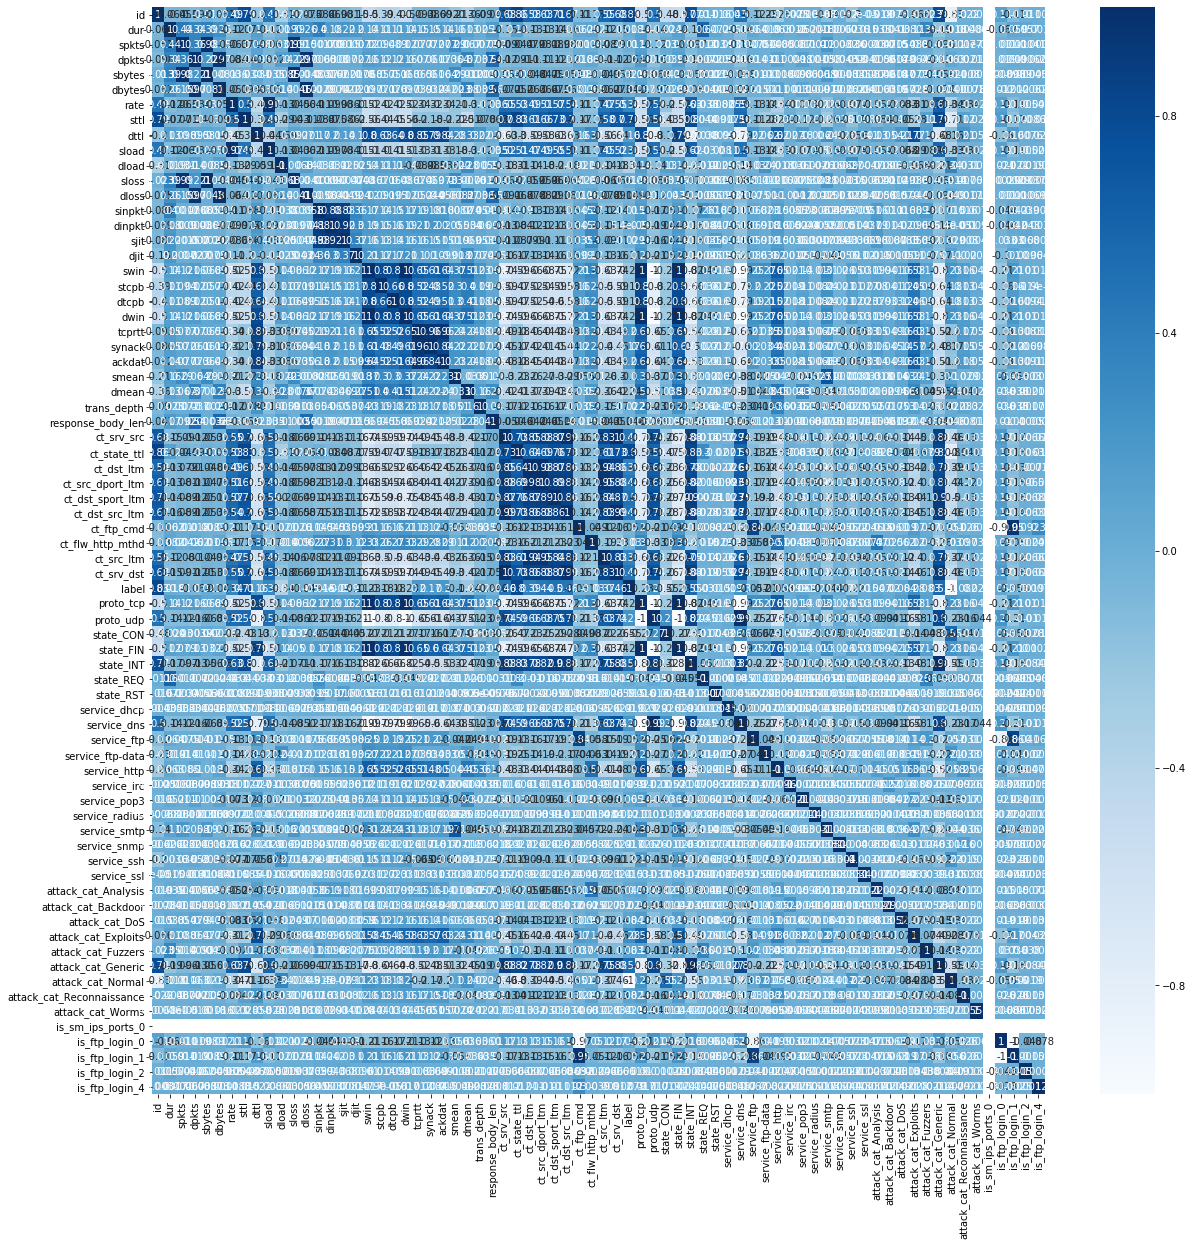

In [12]:
#Feature Selection
#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [13]:
#Correlation with output variable
cor_target = abs(cor["label"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features


id                    0.825206
rate                  0.344535
sttl                  0.707337
sload                 0.334562
dload                 0.343910
ct_srv_src            0.463153
ct_state_ttl          0.801403
ct_dst_ltm            0.387358
ct_src_dport_ltm      0.444874
ct_dst_sport_ltm      0.497234
ct_dst_src_ltm        0.463735
ct_src_ltm            0.368486
ct_srv_dst            0.459984
label                 1.000000
state_CON             0.552505
state_INT             0.546631
attack_cat_Generic    0.547170
attack_cat_Normal     1.000000
Name: label, dtype: float64

In [14]:
 # To check whether independent variables are uncorrelated with each other. 
print(df[["rate","sttl","sload","ct_srv_src","ct_state_ttl","ct_dst_ltm","ct_src_dport_ltm","ct_dst_sport_ltm","ct_dst_src_ltm","ct_src_ltm","ct_srv_dst","label","state_INT","attack_cat_Generic"]].corr())


                        rate      sttl     sload  ct_srv_src  ct_state_ttl  \
rate                1.000000  0.504380  0.972362    0.546409      0.525267   
sttl                0.504380  1.000000  0.486421    0.703589      0.832543   
sload               0.972362  0.486421  1.000000    0.522162      0.511638   
ct_srv_src          0.546409  0.703589  0.522162    1.000000      0.733158   
ct_state_ttl        0.525267  0.832543  0.511638    0.733158      1.000000   
ct_dst_ltm          0.487709  0.609544  0.465984    0.854226      0.635296   
ct_src_dport_ltm    0.509884  0.655168  0.487783    0.882359      0.685579   
ct_dst_sport_ltm    0.572366  0.726563  0.547831    0.866259      0.763502   
ct_dst_src_ltm      0.543014  0.698906  0.519002    0.988974      0.726518   
ct_src_ltm          0.466915  0.584249  0.445944    0.828080      0.612297   
ct_srv_dst          0.547375  0.702219  0.522973    0.995133      0.731367   
label               0.344535  0.707337  0.334562    0.463153    

In [15]:
#Traiing and Testing data
x_train=pd.DataFrame(df, columns=["rate","sttl","sload","ct_srv_src","ct_state_ttl","ct_dst_ltm","ct_src_dport_ltm","ct_dst_sport_ltm"
                                  ,"ct_dst_src_ltm","ct_src_ltm","ct_srv_dst","state_INT","attack_cat_Generic"])
y_train =pd.DataFrame(df,columns=['label'])
x_test=pd.DataFrame(test, columns=["rate","sttl","sload","ct_srv_src","ct_state_ttl","ct_dst_ltm","ct_src_dport_ltm","ct_dst_sport_ltm","ct_dst_src_ltm","ct_src_ltm","ct_srv_dst","state_INT","attack_cat_Generic"])
y_test =pd.DataFrame(test,columns=['label'])
print(x_train.shape)
print(x_test.shape)

(81173, 13)
(35179, 13)


In [16]:
df.shape

(81173, 72)

In [17]:
test.shape

(35179, 70)

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Logistic Regression

In [19]:
#logistic Regression

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train, y_train)

C:\Users\veena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\veena\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy of logistic regression classifier on test set: 0.92

Confusion Matrix is :
 [[ 6916  2709]
 [   85 25469]]

 Printing Confusion Matrix



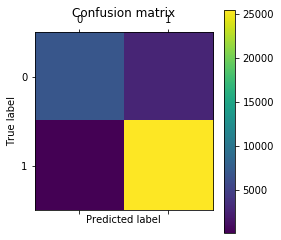

Classification Report is:
               precision    recall  f1-score   support

           0       0.99      0.72      0.83      9625
           1       0.90      1.00      0.95     25554

    accuracy                           0.92     35179
   macro avg       0.95      0.86      0.89     35179
weighted avg       0.93      0.92      0.92     35179



In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test))) 

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix is :\n',cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\n Printing Confusion Matrix\n')
plt.show()

print("Classification Report is:\n",classification_report(y_test, y_pred))
#print(classification_report(y_test, y_pred))

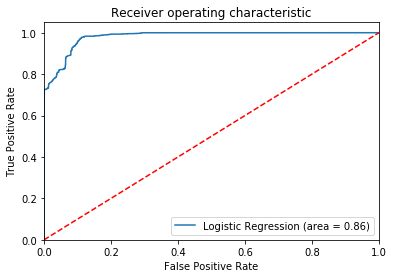

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


# Nearest Neighbour

In [22]:
x=x_train.head(50000)
y=y_train.head(50000)

In [24]:
#knn classfrom sklearn.neighbors import KNeighborsClassifierifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

C:\Users\veena\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Accuracy of nearest neighbor classifier on test set: 0.91

Confusion Matrix is :
 [[ 7226  2399]
 [  633 24921]]

 Printing Confusion Matrix



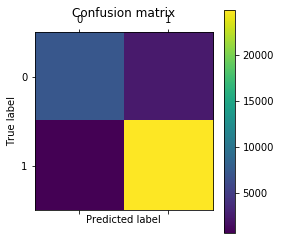

Classification Report is:
               precision    recall  f1-score   support

           0       0.92      0.75      0.83      9625
           1       0.91      0.98      0.94     25554

    accuracy                           0.91     35179
   macro avg       0.92      0.86      0.88     35179
weighted avg       0.91      0.91      0.91     35179



In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


print('Accuracy of nearest neighbor classifier on test set: {:.2f}'.format(knn.score(x_test, y_test)))


cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix is :\n',cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\n Printing Confusion Matrix\n')
plt.show()

print("Classification Report is:\n",classification_report(y_test, y_pred))

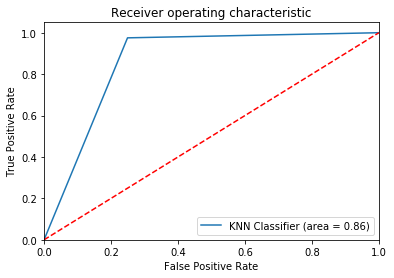

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test, knn.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN Classifier (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

# Support Vector Machine

In [27]:
from sklearn.svm import SVC

clf = SVC(probability=True)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

C:\Users\veena\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\veena\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM on test set: 0.92
Confusion Matrix is :
 [[ 6829  2796]
 [    2 25552]]

 Printing Confusion Matrix



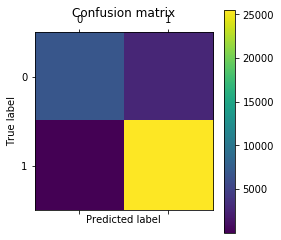

Classification Report is:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83      9625
           1       0.90      1.00      0.95     25554

    accuracy                           0.92     35179
   macro avg       0.95      0.85      0.89     35179
weighted avg       0.93      0.92      0.92     35179



In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


print('Accuracy of SVM on test set: {:.2f}'.format(clf.score(x_test, y_test)))

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is :\n',cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\n Printing Confusion Matrix\n')
plt.show()

print("Classification Report is:\n",classification_report(y_test, y_pred))

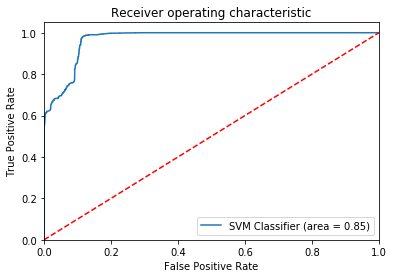

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
svm_roc_auc = roc_auc_score(y_test, clf.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM Classifier (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

# Neural Network

In [67]:
x_train=pd.DataFrame(df, columns=["rate","sttl","sload","ct_srv_src","ct_state_ttl","ct_dst_ltm","ct_src_dport_ltm","ct_dst_sport_ltm"
                                  ,"ct_dst_src_ltm","ct_src_ltm","ct_srv_dst","state_INT","attack_cat_Generic"])
y_train =pd.DataFrame(df,columns=['label'])

In [68]:
# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)

In [69]:
# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
from sklearn import preprocessing
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

In [70]:
new_train = df[["rate","sttl","sload","ct_srv_src","ct_state_ttl","ct_dst_ltm","ct_src_dport_ltm","ct_dst_sport_ltm"
                                   ,"ct_dst_src_ltm","ct_src_ltm","ct_srv_dst","state_INT","attack_cat_Generic","label"]].copy()

In [72]:
label = encode_text_index(new_train,"label")

x,y = to_xy(new_train,"label")

In [73]:
x.shape

(81173, 13)

In [74]:
y.shape

(81173, 2)

In [75]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [76]:
xtest=pd.DataFrame(test, columns=["rate","sttl","sload","ct_srv_src","ct_state_ttl","ct_dst_ltm","ct_src_dport_ltm","ct_dst_sport_ltm"
                                   ,"ct_dst_src_ltm","ct_src_ltm","ct_srv_dst","state_INT","attack_cat_Generic"])
y_test =pd.DataFrame(test,columns=['label'])

In [77]:
new = test[["rate","sttl","sload","ct_srv_src","ct_state_ttl","ct_dst_ltm","ct_src_dport_ltm","ct_dst_sport_ltm"
                                   ,"ct_dst_src_ltm","ct_src_ltm","ct_srv_dst","state_INT","attack_cat_Generic","label"]].copy()

In [78]:
label = encode_text_index(new,"label")

x1,y1 = to_xy(new,"label")

In [79]:
x1.shape

(35179, 13)

In [80]:
x1

array([[-0.654855  , -1.1006355 , -0.63644636, ..., -0.707906  ,
         0.        ,  0.        ],
       [-0.6548856 , -1.1006355 , -0.636474  , ..., -0.707906  ,
         0.        ,  0.        ],
       [-0.65486264, -1.1006355 , -0.63645077, ..., -0.8450296 ,
         0.        ,  0.        ],
       ...,
       [-0.6544425 ,  0.79066795, -0.62845325, ..., -0.7764678 ,
         0.        ,  0.        ],
       [-0.65434784,  0.79066795, -0.6269843 , ..., -0.707906  ,
         0.        ,  0.        ],
       [-0.6546984 ,  0.79066795, -0.6328308 , ..., -0.8450296 ,
         0.        ,  0.        ]], dtype=float32)

In [81]:
y1.shape

(35179, 2)

In [82]:
y1

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [83]:
X_test=xtest.as_matrix(columns=None)

C:\Users\veena\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [84]:
y.shape

(81173, 2)

# Training Neural Network with Relu activation function and Adam optimizer

In [85]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn import metrics

In [86]:
# Define ModelCheckpoint outside the loop
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project 1\wts.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)

    # Build network
    model = Sequential()
    model.add(Dense(50, input_dim=x.shape[1], activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(y.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

    model.fit(x,y,validation_data=(x1,y1),callbacks=[monitor,checkpointer],verbose=2,epochs=100)


print('Training finished...Loading the best model')  
print()


0
Train on 81173 samples, validate on 35179 samples
Epoch 1/100
 - 6s - loss: 0.0743 - val_loss: 0.1417
Epoch 2/100
 - 4s - loss: 0.0594 - val_loss: 0.1564
Epoch 3/100
 - 4s - loss: 0.0571 - val_loss: 0.1481
Epoch 4/100
 - 4s - loss: 0.0558 - val_loss: 0.1603
Epoch 5/100
 - 5s - loss: 0.0555 - val_loss: 0.1485
Epoch 6/100
 - 4s - loss: 0.0548 - val_loss: 0.1480
Epoch 00006: early stopping
1
Train on 81173 samples, validate on 35179 samples
Epoch 1/100
 - 5s - loss: 0.0734 - val_loss: 0.1788
Epoch 2/100
 - 6s - loss: 0.0591 - val_loss: 0.2134
Epoch 3/100
 - 8s - loss: 0.0573 - val_loss: 0.1819
Epoch 4/100
 - 9s - loss: 0.0557 - val_loss: 0.1627
Epoch 5/100
 - 6s - loss: 0.0548 - val_loss: 0.1723
Epoch 6/100
 - 5s - loss: 0.0551 - val_loss: 0.1759
Epoch 7/100
 - 6s - loss: 0.0547 - val_loss: 0.1892
Epoch 8/100
 - 6s - loss: 0.0542 - val_loss: 0.1716
Epoch 9/100
 - 5s - loss: 0.0539 - val_loss: 0.1645
Epoch 00009: early stopping
2
Train on 81173 samples, validate on 35179 samples
Epoch 1/

In [94]:
model.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project 1\wts.hdf5") # load weights from best model

# Measure accuracy
pred = model.predict(x1)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y1,axis=1)

score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))

Final accuracy: 0.9449387418630433


Precision score : 0.9317708142893707
Recall score    : 0.9972215700086092
F1 score        : 0.9633858193297167

[[ 7759  1866]
 [   71 25483]]

Plotting confusion matrix


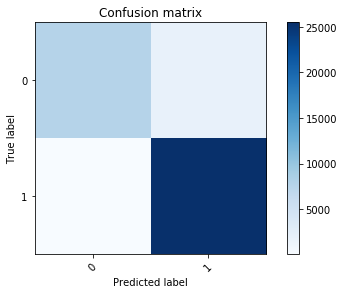

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      9625
           1       0.93      1.00      0.96     25554

    accuracy                           0.94     35179
   macro avg       0.96      0.90      0.93     35179
weighted avg       0.95      0.94      0.94     35179



In [89]:
model.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project 1\wts.hdf5")

pred = model.predict(x1)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y1,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, label)
plt.show()

print(classification_report(y_true, pred))

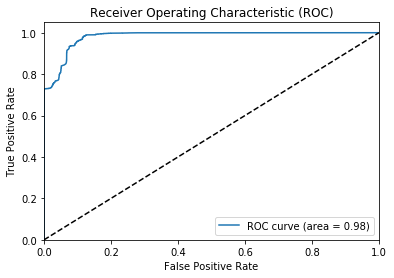

In [90]:
pred = model.predict(x1)
pred = pred[:,1] # Only positive class (M)
plot_roc(pred,y_true)

# Training Neural Network with Relu activation function and Sgd optimizer

In [92]:
# Define ModelCheckpoint outside the loop
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project 1\wts2.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)

    # Build network
    model2 = Sequential()
    model2.add(Dense(50, input_dim=x.shape[1], activation='relu'))
    model2.add(Dense(50, activation='relu'))
    model2.add(Dense(y.shape[1], activation='softmax'))
    model2.compile(loss='categorical_crossentropy', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

    model2.fit(x,y,validation_data=(x1,y1),callbacks=[monitor,checkpointer],verbose=2,epochs=100)


print('Training finished...Loading the best model')  
print()


0
Train on 81173 samples, validate on 35179 samples
Epoch 1/100
 - 5s - loss: 0.1402 - val_loss: 0.1685
Epoch 2/100
 - 4s - loss: 0.0728 - val_loss: 0.1584
Epoch 3/100
 - 4s - loss: 0.0690 - val_loss: 0.1491
Epoch 4/100
 - 7s - loss: 0.0665 - val_loss: 0.1477
Epoch 5/100
 - 4s - loss: 0.0648 - val_loss: 0.1415
Epoch 6/100
 - 7s - loss: 0.0634 - val_loss: 0.1411
Epoch 7/100
 - 5s - loss: 0.0625 - val_loss: 0.1413
Epoch 8/100
 - 4s - loss: 0.0617 - val_loss: 0.1391
Epoch 9/100
 - 4s - loss: 0.0611 - val_loss: 0.1380
Epoch 10/100
 - 5s - loss: 0.0604 - val_loss: 0.1427
Epoch 11/100
 - 4s - loss: 0.0598 - val_loss: 0.1407
Epoch 12/100
 - 4s - loss: 0.0592 - val_loss: 0.1492
Epoch 13/100
 - 5s - loss: 0.0589 - val_loss: 0.1406
Epoch 14/100
 - 4s - loss: 0.0585 - val_loss: 0.1448
Epoch 00014: early stopping
1
Train on 81173 samples, validate on 35179 samples
Epoch 1/100
 - 6s - loss: 0.1423 - val_loss: 0.1615
Epoch 2/100
 - 5s - loss: 0.0735 - val_loss: 0.1575
Epoch 3/100
 - 5s - loss: 0.069

In [95]:
model2.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project 1\wts2.hdf5") # load weights from best model

# Measure accuracy
pred = model2.predict(x1)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y1,axis=1)

score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))

Final accuracy: 0.9443986469200375


Precision score : 0.9308405754765209
Recall score    : 0.9975737653596306
F1 score        : 0.9630525122780507

[[ 7731  1894]
 [   62 25492]]

Plotting confusion matrix


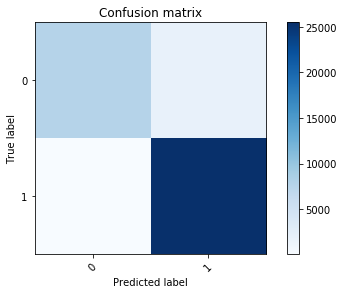

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      9625
           1       0.93      1.00      0.96     25554

    accuracy                           0.94     35179
   macro avg       0.96      0.90      0.93     35179
weighted avg       0.95      0.94      0.94     35179



In [96]:
model2.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project 1\wts2.hdf5")

pred = model2.predict(x1)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y1,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, label)
plt.show()

print(classification_report(y_true, pred))

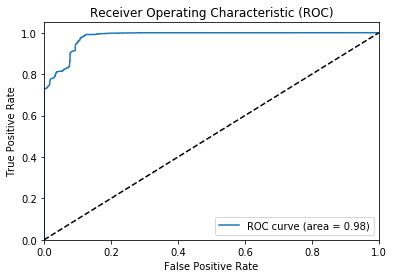

In [97]:
pred = model2.predict(x1)
pred = pred[:,1] # Only positive class (M)
plot_roc(pred,y_true)

# Training Neural Network with Tanh activation function and Adam optimizer

In [98]:
# Define ModelCheckpoint outside the loop
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project 1\wts3.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)

    # Build network
    model3 = Sequential()
    model3.add(Dense(50, input_dim=x.shape[1], activation='tanh'))
    model3.add(Dense(50, activation='tanh'))
    model3.add(Dense(y.shape[1], activation='softmax'))
    model3.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

    model3.fit(x,y,validation_data=(x1,y1),callbacks=[monitor,checkpointer],verbose=2,epochs=100)


print('Training finished...Loading the best model')  
print()

0
Train on 81173 samples, validate on 35179 samples
Epoch 1/100
 - 6s - loss: 0.0870 - val_loss: 0.1745
Epoch 2/100
 - 4s - loss: 0.0633 - val_loss: 0.1444
Epoch 3/100
 - 4s - loss: 0.0615 - val_loss: 0.1480
Epoch 4/100
 - 4s - loss: 0.0604 - val_loss: 0.1569
Epoch 5/100
 - 4s - loss: 0.0597 - val_loss: 0.1583
Epoch 6/100
 - 4s - loss: 0.0589 - val_loss: 0.1488
Epoch 7/100
 - 4s - loss: 0.0577 - val_loss: 0.1430
Epoch 8/100
 - 4s - loss: 0.0569 - val_loss: 0.1455
Epoch 9/100
 - 4s - loss: 0.0560 - val_loss: 0.1632
Epoch 10/100
 - 4s - loss: 0.0555 - val_loss: 0.1494
Epoch 11/100
 - 5s - loss: 0.0548 - val_loss: 0.1499
Epoch 12/100
 - 4s - loss: 0.0545 - val_loss: 0.1453
Epoch 00012: early stopping
1
Train on 81173 samples, validate on 35179 samples
Epoch 1/100
 - 5s - loss: 0.0859 - val_loss: 0.1550
Epoch 2/100
 - 4s - loss: 0.0628 - val_loss: 0.1446
Epoch 3/100
 - 5s - loss: 0.0613 - val_loss: 0.1477
Epoch 4/100
 - 4s - loss: 0.0601 - val_loss: 0.1394
Epoch 5/100
 - 5s - loss: 0.0592 

In [99]:
model3.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project 1\wts3.hdf5") # load weights from best model

# Measure accuracy
pred = model3.predict(x1)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y1,axis=1)

score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))

Final accuracy: 0.9482077375707098


Precision score : 0.939774664591209
Recall score    : 0.99229083509431
F1 score        : 0.9653190193391199

[[ 8000  1625]
 [  197 25357]]

Plotting confusion matrix


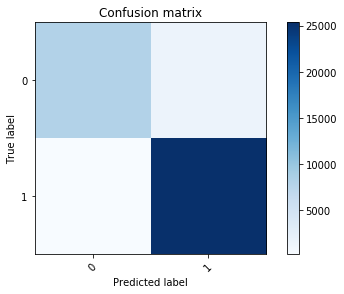

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      9625
           1       0.94      0.99      0.97     25554

    accuracy                           0.95     35179
   macro avg       0.96      0.91      0.93     35179
weighted avg       0.95      0.95      0.95     35179



In [100]:
model3.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project 1\wts3.hdf5")

pred = model3.predict(x1)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y1,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, label)
plt.show()

print(classification_report(y_true, pred))

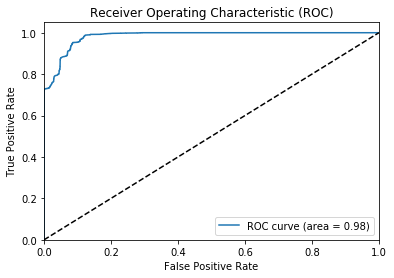

In [102]:
model3.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project 1\wts3.hdf5")

pred = model3.predict(x1)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

# Training Neural Network with Tanh activation function and Sgd optimizer

In [103]:
# Define ModelCheckpoint outside the loop
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project 1\wts4.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)

    # Build network
    model4 = Sequential()
    model4.add(Dense(50, input_dim=x.shape[1], activation='tanh'))
    model4.add(Dense(50, activation='tanh'))
    model4.add(Dense(y.shape[1], activation='softmax'))
    model4.compile(loss='categorical_crossentropy', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

    model4.fit(x,y,validation_data=(x1,y1),callbacks=[monitor,checkpointer],verbose=2,epochs=100)


print('Training finished...Loading the best model')  
print()

0
Train on 81173 samples, validate on 35179 samples
Epoch 1/100
 - 6s - loss: 0.1155 - val_loss: 0.1763
Epoch 2/100
 - 5s - loss: 0.0742 - val_loss: 0.1811
Epoch 3/100
 - 7s - loss: 0.0701 - val_loss: 0.1710
Epoch 4/100
 - 7s - loss: 0.0677 - val_loss: 0.1586
Epoch 5/100
 - 5s - loss: 0.0659 - val_loss: 0.1644
Epoch 6/100
 - 5s - loss: 0.0646 - val_loss: 0.1612
Epoch 7/100
 - 5s - loss: 0.0637 - val_loss: 0.1592
Epoch 8/100
 - 4s - loss: 0.0627 - val_loss: 0.1801
Epoch 9/100
 - 4s - loss: 0.0622 - val_loss: 0.1592
Epoch 00009: early stopping
1
Train on 81173 samples, validate on 35179 samples
Epoch 1/100
 - 6s - loss: 0.1081 - val_loss: 0.1750
Epoch 2/100
 - 4s - loss: 0.0737 - val_loss: 0.1650
Epoch 3/100
 - 5s - loss: 0.0702 - val_loss: 0.1640
Epoch 4/100
 - 4s - loss: 0.0681 - val_loss: 0.1654
Epoch 5/100
 - 4s - loss: 0.0667 - val_loss: 0.1636
Epoch 6/100
 - 4s - loss: 0.0654 - val_loss: 0.1611
Epoch 7/100
 - 5s - loss: 0.0643 - val_loss: 0.1725
Epoch 8/100
 - 5s - loss: 0.0635 - v

In [104]:
model4.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project 1\wts4.hdf5") # load weights from best model

# Measure accuracy
pred = model4.predict(x1)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y1,axis=1)

score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))

Final accuracy: 0.9467864350891156


Precision score : 0.9357153370621136
Recall score    : 0.9951083979024811
F1 score        : 0.9644983880144131

[[ 7878  1747]
 [  125 25429]]

Plotting confusion matrix


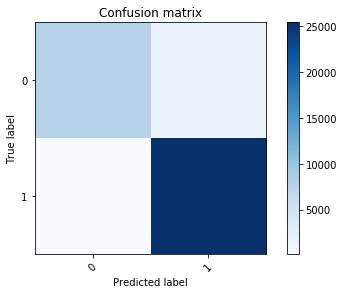

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      9625
           1       0.94      1.00      0.96     25554

    accuracy                           0.95     35179
   macro avg       0.96      0.91      0.93     35179
weighted avg       0.95      0.95      0.95     35179



In [105]:
model4.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project 1\wts4.hdf5")

pred = model4.predict(x1)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y1,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, label)
plt.show()

print(classification_report(y_true, pred))

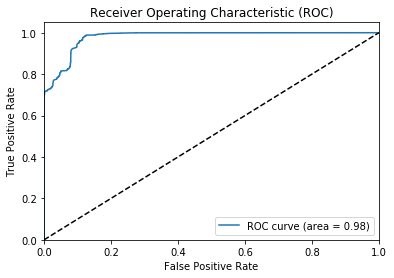

In [106]:
model4.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project 1\wts4.hdf5")

pred = model4.predict(x1)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

# Training Neural Network with Sigmoid activation function and Sgd optimizer

In [107]:
# Define ModelCheckpoint outside the loop
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project 1\wts5.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)

    # Build network
    model5 = Sequential()
    model5.add(Dense(50, input_dim=x.shape[1], activation='sigmoid'))
    model5.add(Dense(50, activation='sigmoid'))
    model5.add(Dense(y.shape[1], activation='softmax'))
    model5.compile(loss='categorical_crossentropy', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

    model5.fit(x,y,validation_data=(x1,y1),callbacks=[monitor,checkpointer],verbose=2,epochs=100)


print('Training finished...Loading the best model')  
print()

0
Train on 81173 samples, validate on 35179 samples
Epoch 1/100
 - 6s - loss: 0.4057 - val_loss: 0.2881
Epoch 2/100
 - 5s - loss: 0.1914 - val_loss: 0.2011
Epoch 3/100
 - 5s - loss: 0.1123 - val_loss: 0.1866
Epoch 4/100
 - 5s - loss: 0.0918 - val_loss: 0.1860
Epoch 5/100
 - 4s - loss: 0.0853 - val_loss: 0.1791
Epoch 6/100
 - 5s - loss: 0.0820 - val_loss: 0.1815
Epoch 7/100
 - 5s - loss: 0.0797 - val_loss: 0.1792
Epoch 8/100
 - 5s - loss: 0.0782 - val_loss: 0.1769
Epoch 9/100
 - 5s - loss: 0.0770 - val_loss: 0.1755
Epoch 10/100
 - 5s - loss: 0.0762 - val_loss: 0.1776
Epoch 11/100
 - 5s - loss: 0.0755 - val_loss: 0.1676
Epoch 12/100
 - 5s - loss: 0.0749 - val_loss: 0.1719
Epoch 13/100
 - 5s - loss: 0.0745 - val_loss: 0.1713
Epoch 14/100
 - 5s - loss: 0.0741 - val_loss: 0.1737
Epoch 15/100
 - 5s - loss: 0.0737 - val_loss: 0.1778
Epoch 16/100
 - 5s - loss: 0.0733 - val_loss: 0.1730
Epoch 00016: early stopping
1
Train on 81173 samples, validate on 35179 samples
Epoch 1/100
 - 6s - loss: 0.4

In [108]:
model5.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project 1\wts5.hdf5") # load weights from best model

# Measure accuracy
pred = model5.predict(x1)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y1,axis=1)

score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))

Final accuracy: 0.9210040080729981


Precision score : 0.9029974873482677
Recall score    : 0.9985129529623542
F1 score        : 0.948356284031146

[[ 6884  2741]
 [   38 25516]]

Plotting confusion matrix


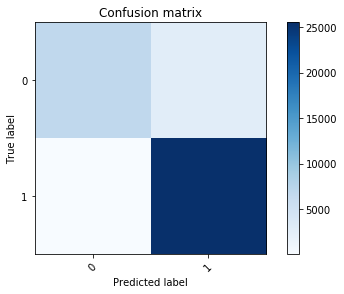

              precision    recall  f1-score   support

           0       0.99      0.72      0.83      9625
           1       0.90      1.00      0.95     25554

    accuracy                           0.92     35179
   macro avg       0.95      0.86      0.89     35179
weighted avg       0.93      0.92      0.92     35179



In [109]:
model5.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project 1\wts5.hdf5")

pred = model5.predict(x1)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y1,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, label)
plt.show()

print(classification_report(y_true, pred))

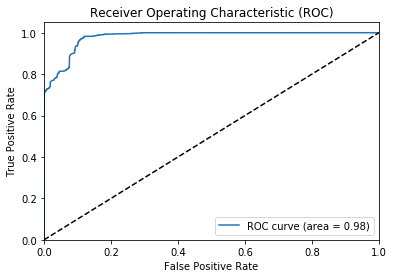

In [110]:
model5.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project 1\wts5.hdf5")

pred = model5.predict(x1)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)

# Training Neural Network with Sigmoid activation function and Adam optimizer

In [111]:
# Define ModelCheckpoint outside the loop
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project 1\wts6.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)

    # Build network
    model6 = Sequential()
    model6.add(Dense(50, input_dim=x.shape[1], activation='sigmoid'))
    model6.add(Dense(50, activation='sigmoid'))
    model6.add(Dense(y.shape[1], activation='softmax'))
    model6.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

    model6.fit(x,y,validation_data=(x1,y1),callbacks=[monitor,checkpointer],verbose=2,epochs=100)


print('Training finished...Loading the best model')  
print()

0
Train on 81173 samples, validate on 35179 samples
Epoch 1/100
 - 10s - loss: 0.1499 - val_loss: 0.1716
Epoch 2/100
 - 6s - loss: 0.0731 - val_loss: 0.1543
Epoch 3/100
 - 5s - loss: 0.0698 - val_loss: 0.1547
Epoch 4/100
 - 8s - loss: 0.0681 - val_loss: 0.1634
Epoch 5/100
 - 6s - loss: 0.0662 - val_loss: 0.1504
Epoch 6/100
 - 5s - loss: 0.0643 - val_loss: 0.1785
Epoch 7/100
 - 5s - loss: 0.0627 - val_loss: 0.1739
Epoch 8/100
 - 5s - loss: 0.0619 - val_loss: 0.1787
Epoch 9/100
 - 6s - loss: 0.0608 - val_loss: 0.1506
Epoch 10/100
 - 8s - loss: 0.0604 - val_loss: 0.1779
Epoch 00010: early stopping
1
Train on 81173 samples, validate on 35179 samples
Epoch 1/100
 - 7s - loss: 0.1585 - val_loss: 0.1825
Epoch 2/100
 - 5s - loss: 0.0742 - val_loss: 0.1713
Epoch 3/100
 - 5s - loss: 0.0693 - val_loss: 0.1663
Epoch 4/100
 - 5s - loss: 0.0664 - val_loss: 0.1602
Epoch 5/100
 - 5s - loss: 0.0639 - val_loss: 0.1586
Epoch 6/100
 - 5s - loss: 0.0623 - val_loss: 0.1592
Epoch 7/100
 - 5s - loss: 0.0614 -

In [112]:
model6.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project 1\wts6.hdf5") # load weights from best model

# Measure accuracy
pred = model6.predict(x1)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y1,axis=1)

score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))

Final accuracy: 0.9430626225873391


Precision score : 0.9314792422410318
Recall score    : 0.9947953353682398
F1 score        : 0.9620966978900558

[[ 7755  1870]
 [  133 25421]]

Plotting confusion matrix


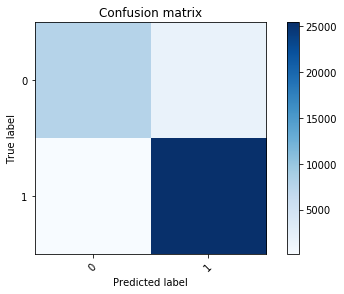

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      9625
           1       0.93      0.99      0.96     25554

    accuracy                           0.94     35179
   macro avg       0.96      0.90      0.92     35179
weighted avg       0.95      0.94      0.94     35179



In [113]:
model6.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project 1\wts6.hdf5")

pred = model6.predict(x1)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y1,axis=1) 

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, label)
plt.show()

print(classification_report(y_true, pred))

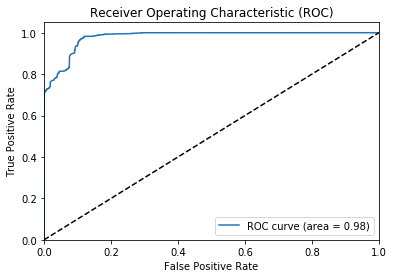

In [114]:
model6.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project 1\wts5.hdf5")

pred = model6.predict(x1)

pred = pred[:,1] # Only positive class (1)
plot_roc(pred,y_true)